<table align="left">
  <td>
    <a href="https://is.gd/SS5YTd" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Ex 1 Taller 2 - AG
Diego R. Páez Ardila

2022


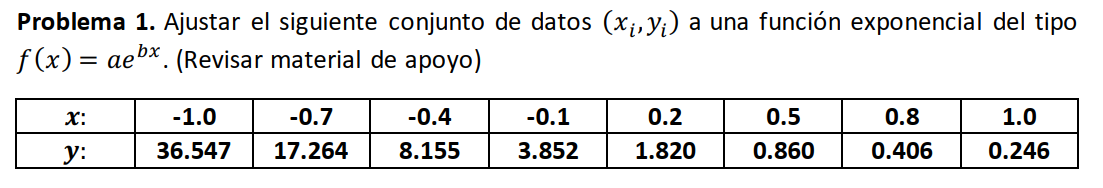

## Instalación de Paquetes

In [ ]:
# https://deap.readthedocs.io/en/master/
!pip install deap

In [ ]:
# Bibliotecas a serem utilizadas
import random
import numpy as np
from deap import algorithms, base, creator, tools

## Preparación para Optimización

1. **Función objetivo**:
2. **Variables de decisión**
3. **Operadores**

In [ ]:
# Función Objetivo
def objetive_function(individual):
  #codigo de la función
  x_ref = [-1.0,-0.7,-0.4,-0.1,0.2,0.5,0.8,1.0]
  y_ref = [36.547, 17.264, 8.155, 3.852,1.820, 0.860, 0.406, 0.246]
  
  y_exp = individual[0]*np.exp(individual[1]*np.asarray(x_ref))

  result = (np.square(y_ref - y_exp)).mean()
  #resultado retorna como tupla (result)
  return (result,)

In [ ]:
# Creación estructura de fitness e individuo
##para problema de maximización el peso es positivo y minimización el peso es negativo
creator.create("FitnessMax", base.Fitness, weights=(-1.0,)) 
creator.create("Individual",list, fitness=creator.FitnessMax)

In [ ]:
toolbox = base.Toolbox()

# Generador de atributos reales: nombre, función que genera cada variable, intervalo (limite superior e inferior)
toolbox.register("attr_real", random.uniform,-10.0,10.0)

# Generador de individuo
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_real, 2)

# Generar la población

toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [ ]:
#Inicializar Operadores: https://deap.readthedocs.io/en/master/api/tools.html
toolbox.register("evaluate",objetive_function)
toolbox.register("mate", tools.cxSimulatedBinaryBounded, eta=0.5,low=-10.0, up= 10.0)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb =0.05)
toolbox.register("select",tools.selTournament, tournsize=3)

In [ ]:
pop = toolbox.population(n=100)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind:ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

# Optimización
Evolución

In [ ]:
pop, log =algorithms.eaSimple(population=pop, toolbox=toolbox, cxpb=0.5, mutpb=0.1, ngen=100, stats=stats, halloffame=hof, verbose=True)

gen	nevals	avg        	std        	min    	max        
0  	100   	5.88021e+07	2.48342e+08	20.6612	2.01433e+09
1  	58    	73589.6    	370244     	20.6612	3.43647e+06
2  	54    	3420.55    	25998      	15.7169	261090     
3  	62    	16414.5    	105229     	5.61547	801674     
4  	56    	4.97422e+06	4.88933e+07	1.18614	4.91425e+08
5  	63    	119445     	900525     	1.18614	8.93195e+06
6  	60    	6019.78    	31055.3    	1.18614	254116     
7  	53    	78.7487    	422.601    	1.18614	3878.62    
8  	49    	86.7669    	671.823    	0.138984	6758.62    
9  	50    	108.123    	537.19     	0.138984	4919       
10 	66    	92.6983    	390.489    	0.138984	3251.94    
11 	61    	9.1119     	37.751     	0.0328753	284.86     
12 	57    	17.3641    	105.332    	0.0328753	1017.11    
13 	65    	0.780645   	2.32401    	0.0328753	20.6681    
14 	60    	2.01647    	16.6289    	0.0328753	167.342    
15 	48    	0.287402   	0.964039   	0.0328753	7.19891    
16 	52    	0.118847   	0.156304   	0.0168655	1.15891

# Resultados

In [ ]:
# A melhor solução
print("Melhor Individuo: ")
print(hof[0])


# Validação do melhor indivíduo
print("Fitness:")
print(objetive_function(hof[0]))

Mejor Individuo: 
[3.000049223124294, -2.4999728579650626]
Fitness:
(6.384823722441833e-08,)


# Gráfico de la función para la validación del resultado

In [ ]:
x_ref = [-1.0,-0.7,-0.4,-0.1,0.2,0.5,0.8,1.0]
y_ref = [36.547, 17.264, 8.155, 3.852,1.820, 0.860, 0.406, 0.246]

A = hof[0][0]
B = hof[0][1] 
y_exp = A*np.exp(B*np.asarray(x_ref))


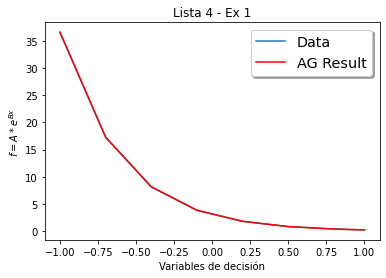

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x_ref,y_ref,label='Data')
plt.plot(x_ref,y_exp,color="red",label='AG Result')

plt.title("Lista 4 - Ex 1")
plt.xlabel("Variables de decisión")
plt.ylabel(r'$f=A*e^{Bx}$')
plt.legend(loc='upper right', shadow=True, fontsize='x-large')

plt.show()